<a href="https://colab.research.google.com/github/yoyo098567/digital-forecast/blob/main/%E6%95%B8%E5%AD%97%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers  import Dense
from tensorflow.keras import optimizers
# from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
len(X_test)

10000

In [ ]:
np.set_printoptions(linewidth=np.inf) #設定列印顯示為一行，inf為無限大
X_train[6]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 145, 255, 211,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 237, 253, 252,  71,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 175, 253, 252,  71,   0,   0,   0,   0

In [ ]:
Y_train.shape

(60000,)

In [ ]:
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [ ]:
X_test[0:10]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
Y_test[0:1000]


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4,
       8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6,
       5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5,
       1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7,
       1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6,
       4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5,
       7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9,
       8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7,
       9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2,
       6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


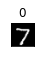

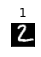

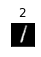

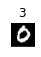

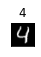

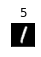

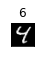

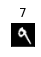

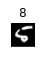

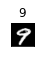

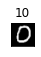

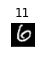

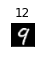

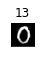

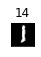

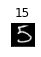

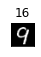

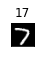

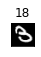

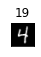

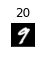

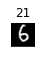

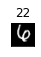

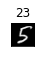

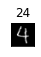

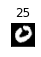

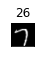

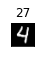

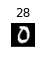

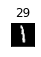

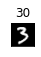

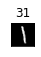

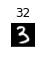

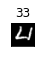

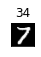

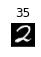

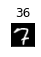

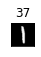

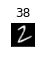

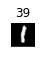

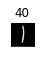

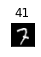

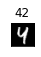

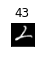

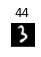

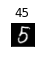

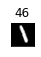

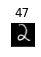

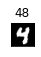

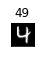

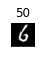

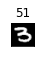

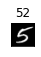

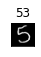

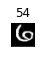

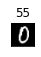

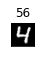

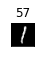

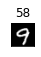

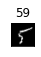

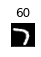

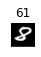

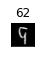

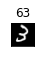

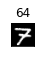

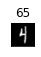

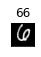

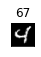

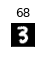

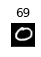

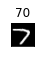

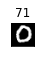

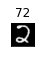

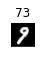

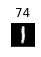

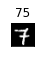

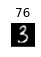

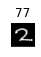

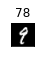

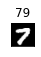

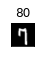

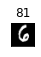

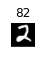

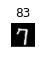

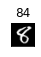

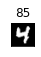

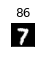

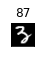

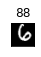

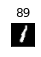

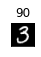

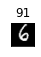

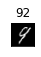

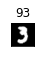

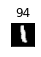

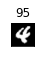

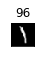

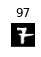

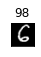

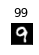

In [ ]:
for k in range(100):
  plt.figure(figsize=(10,10))
  plt.subplot(5,20, k+1)
  plt.imshow(X_test[k], cmap='gray')
  plt.xticks([]) #將x軸顯示為空
  plt.yticks([]) #將y軸顯示為空
  plt.title(k)  #設置圖片標題
plt.tight_layout()
#plt.show()

# 資料預處理

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train=X_train.reshape(60000, 784).astype('float32')
X_test=X_test.reshape(10000, 784).astype('float32')

X_train.dtype

dtype('float32')

### 正規化

In [ ]:
X_train = X_train/255 
X_test = X_test/255

In [ ]:
np.max(X_train)

1.0

In [ ]:
np.set_printoptions(linewidth=180) 
#X_train[0]
np.round(X_train[0],2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.07, 0.07, 0.07, 0.49, 0.53, 0.69, 0.1 

In [ ]:
np.set_printoptions(linewidth=180) 
#X_train[0]
np.round(X_test[0],2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  

###to_categorical

In [ ]:
n_classes =10
Y_train=to_categorical(Y_train, n_classes)
Y_test=to_categorical(Y_test, n_classes)

In [ ]:
print(Y_test[0])
print(Y_train[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


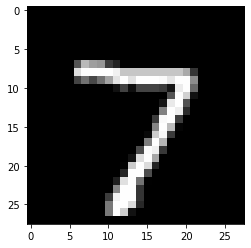

In [ ]:
plt.imshow(X_test[0].reshape((28,28)),cmap='gray')

## 建立神經網路



```
model.add(Dense(64,activation='sigmoid',input_shape=(784,)))#隱藏層+輸入層
model.add(Dense(10,activation='softmax')) 輸出層
```
##當**隱藏層** 層數不多 =淺層神經網路
#####1.使用Sequential()序列建立空model，將神經網路堆疊起來
#####2.使用add方法建立各神經層，從第一層開始建立，其兼具輸入層與隱藏層，activation=激活函數
#####3.Dense()建立一個密集層(每個神經元與上一層的每個神經元緊密連結)

In [ ]:
model =Sequential()
model.add(Dense(64,activation='sigmoid',input_shape=(784,)))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer=optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


##訓練神經網路

In [ ]:
model.fit(X_train, Y_train, batch_size=128, epochs=200, verbose=1,validation_data=(X_test,Y_test))

Epoch 1/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0911 - accuracy: 0.1335 - val_loss: 0.0906 - val_accuracy: 0.1629
Epoch 2/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0901 - accuracy: 0.1765 - val_loss: 0.0898 - val_accuracy: 0.2020
Epoch 3/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0894 - accuracy: 0.2108 - val_loss: 0.0892 - val_accuracy: 0.2334
Epoch 4/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0889 - accuracy: 0.2410 - val_loss: 0.0886 - val_accuracy: 0.2594
Epoch 5/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0884 - accuracy: 0.2659 - val_loss: 0.0882 - val_accuracy: 0.2840
Epoch 6/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0879 - accuracy: 0.2873 - val_loss: 0.0877 - val_accuracy: 0.3032
Epoch 7/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0875 - accuracy: 0.3044 - val_loss: 0.0873 - val_accuracy: 0.3186

In [ ]:
pr=model.predict(X_test[0:1])
pr

array([[0.09141134, 0.10809574, 0.11606258, 0.09012576, 0.09164559, 0.1040827 , 0.10348908, 0.10003775, 0.1053063 , 0.08974316]], dtype=float32)

In [ ]:
np.round(pr,3)

array([[0.091, 0.108, 0.116, 0.09 , 0.092, 0.104, 0.103, 0.1  , 0.105, 0.09 ]], dtype=float32)

In [ ]:
np.argmax(pr)

2

In [ ]:
Y_test[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

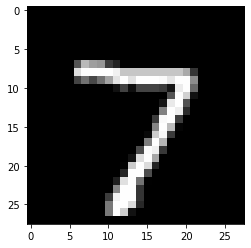

In [ ]:
plt.imshow(X_test[0].reshape((28,28)),cmap='gray')

prediction: [[0.0924 0.1084 0.1131 0.0918 0.0929 0.104  0.1027 0.0986 0.1042 0.092 ]
 [0.0964 0.098  0.1045 0.1007 0.1009 0.098  0.0957 0.1068 0.0934 0.1056]
 [0.0945 0.1091 0.1058 0.0957 0.0894 0.1042 0.1084 0.0928 0.0996 0.1005]
 [0.1007 0.0955 0.0956 0.0959 0.0994 0.0897 0.1068 0.1108 0.1041 0.1014]
 [0.0995 0.1051 0.1012 0.1006 0.0972 0.1014 0.0916 0.1024 0.1054 0.0957]
 [0.0923 0.1071 0.1078 0.0968 0.0923 0.1014 0.1075 0.0946 0.1008 0.0994]
 [0.1072 0.0976 0.1007 0.0897 0.1016 0.1065 0.1024 0.0968 0.0975 0.1001]
 [0.0918 0.103  0.0989 0.0954 0.1064 0.0937 0.104  0.1092 0.0961 0.1015]
 [0.1064 0.0954 0.1077 0.1034 0.0998 0.0912 0.1117 0.0829 0.0998 0.1016]
 [0.1055 0.0979 0.1053 0.1059 0.1051 0.0958 0.0916 0.103  0.0921 0.0978]
 [0.0892 0.1056 0.1034 0.1011 0.1053 0.1054 0.0947 0.0994 0.0955 0.1003]
 [0.1071 0.096  0.0927 0.1098 0.0972 0.1127 0.0959 0.0985 0.0886 0.1016]
 [0.0977 0.1    0.0967 0.093  0.1018 0.0951 0.1043 0.1032 0.1077 0.1005]
 [0.1038 0.1011 0.098  0.0906 0.0941 0.

2

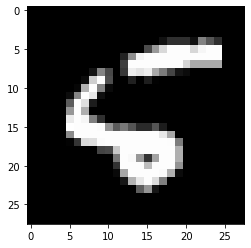

In [ ]:
predictions = model.predict(X_test[0:20])
# get prediction result
print('prediction:', np.round(predictions[0:20],4))
print('actual    :', Y_test[0:20])

# 顯示錯誤的資料圖像
X2 = X_test[8,:]
plt.imshow(X2.reshape(28,28),cmap='gray')

np.argmax(predictions[0:20])

## bitmap image

In [ ]:
digit=plt.imread('/content/drive/MyDrive/人工智慧/第二周功課圖片0-9/6.png')

In [ ]:
digit.shape

(28, 28, 3)

digit[:,:,0]->[所有的列:所有的行:第幾個channel]





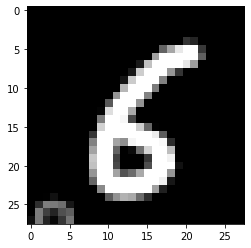

In [ ]:
plt.imshow(digit[:,:,0],cmap='gray')

In [ ]:
digit[:,:,0].reshape((1,784))

array([[0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.  

In [ ]:
digit[:,:,0].reshape((1,-1)).shape

(1, 784)

In [ ]:
p=model.predict(digit[:,:,0].reshape((1,-1)))

In [ ]:
p

array([[0.07135043, 0.05156823, 0.03484876, 0.05863881, 0.02685515, 0.37290227, 0.04645166, 0.00449019, 0.32017344, 0.01272104]], dtype=float32)

In [ ]:
np.argmax(p)

5

In [ ]:
digit3=digit2/255.

In [ ]:
digit3.shape

(28, 28)

In [ ]:
digit3.reshape((1,-1)).shape

(1, 784)

In [ ]:
X_test[0:1].shape

(1, 784)

## 找出最低的三個數字

In [ ]:
import torch

In [ ]:
p1=torch.tensor(p,dtype=torch.float32)

In [ ]:
p1.shape

torch.Size([1, 10])

In [ ]:
a,b = torch.max(p1,1)

In [ ]:
print(a)
print(b)

tensor([0.1068])
tensor([2])


In [ ]:
pre=model.predict(X_test)

In [ ]:
pre

array([[0.09242521, 0.10841122, 0.11306933, ..., 0.09856915, 0.10419945, 0.09196571],
       [0.09642017, 0.09800112, 0.10445013, ..., 0.10681158, 0.09341394, 0.10560817],
       [0.09447212, 0.10911235, 0.10584448, ..., 0.0927882 , 0.0996033 , 0.10051281],
       ...,
       [0.10911483, 0.08802552, 0.10819361, ..., 0.09334679, 0.10356126, 0.09319356],
       [0.09591622, 0.10946923, 0.10425171, ..., 0.10765022, 0.09910344, 0.09704188],
       [0.10987053, 0.0860939 , 0.10888607, ..., 0.09447896, 0.11014964, 0.09279609]], dtype=float32)

In [ ]:
np.round(pre,4)

array([[0.0924, 0.1084, 0.1131, ..., 0.0986, 0.1042, 0.092 ],
       [0.0964, 0.098 , 0.1045, ..., 0.1068, 0.0934, 0.1056],
       [0.0945, 0.1091, 0.1058, ..., 0.0928, 0.0996, 0.1005],
       ...,
       [0.1091, 0.088 , 0.1082, ..., 0.0933, 0.1036, 0.0932],
       [0.0959, 0.1095, 0.1043, ..., 0.1077, 0.0991, 0.097 ],
       [0.1099, 0.0861, 0.1089, ..., 0.0945, 0.1101, 0.0928]], dtype=float32)

In [ ]:
predict_num=torch.tensor(pre)

In [ ]:
rate,index = torch.max(predict_num,1)

In [ ]:
index

tensor([2, 7, 1,  ..., 3, 1, 8])

In [ ]:
lower3 = [1,1,1]
index3 = [0,0,0]

[enumerate() 參考資料](https://www.runoob.com/python/python-func-enumerate.html)

In [ ]:
for i,(a) in enumerate(rate):
  for j,(b) in enumerate(lower3):
    if a < b :

      lower3[j] = a
      print(f"lower3={lower3} , j={j}")
      index3[j] = i
      break;

lower3=[tensor(0.9235), 1, 1] , j=0
lower3=[tensor(0.4729), 1, 1] , j=0
lower3=[tensor(0.4729), tensor(0.8412), 1] , j=1
lower3=[tensor(0.4729), tensor(0.8412), tensor(0.9007)] , j=2
lower3=[tensor(0.4729), tensor(0.6228), tensor(0.9007)] , j=1
lower3=[tensor(0.4729), tensor(0.6228), tensor(0.8864)] , j=2
lower3=[tensor(0.4729), tensor(0.5067), tensor(0.8864)] , j=1
lower3=[tensor(0.4170), tensor(0.5067), tensor(0.8864)] , j=0
lower3=[tensor(0.2910), tensor(0.5067), tensor(0.8864)] , j=0
lower3=[tensor(0.2910), tensor(0.4492), tensor(0.8864)] , j=1
lower3=[tensor(0.2910), tensor(0.4492), tensor(0.7818)] , j=2
lower3=[tensor(0.2849), tensor(0.4492), tensor(0.7818)] , j=0
lower3=[tensor(0.2849), tensor(0.4492), tensor(0.6169)] , j=2
lower3=[tensor(0.2849), tensor(0.3206), tensor(0.6169)] , j=1
lower3=[tensor(0.2849), tensor(0.3206), tensor(0.4587)] , j=2
lower3=[tensor(0.2849), tensor(0.3206), tensor(0.3371)] , j=2
lower3=[tensor(0.2544), tensor(0.3206), tensor(0.3371)] , j=0
lower3=[ten

In [ ]:
print(lower3)

[tensor(0.1403), tensor(0.1477), tensor(0.1595)]


In [ ]:
print(index3)

[8823, 7531, 9777]


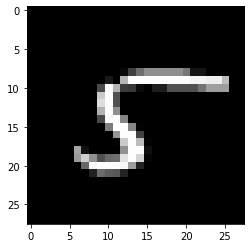

In [ ]:
plt.imshow(X_test[9777].reshape((28,28)),cmap='gray')

In [ ]:
pred=model.predict(X_test[9777:9778])

In [ ]:
np.round(pred,3)

array([[0.112, 0.02 , 0.118, 0.119, 0.16 , 0.144, 0.092, 0.117, 0.056, 0.062]], dtype=float32)

In [ ]:
np.argmax(pred)

4

## 找出各數字總值

In [ ]:
predict_Y=model.predict(X_test)

In [ ]:
predict_Y=np.argmax(predict_Y,1)

In [ ]:
Ytest=np.argmax(Y_test,1)

####predY拿到predict_Y的值，Ytest拿到y_test的值

In [ ]:
for i in range(10):
  row=[i for i in range(10)]
  for j in range(10):
    row[j]=0
    for predY,Ytest in zip(predict_Y,y_test):
      if predY==j and Ytest==i :
       row[j] +=1
  total.append(row)

In [ ]:
import pandas as pd

In [ ]:
#row1=[i for i in range(10)]

In [ ]:
row1=[i for i in range(10)]

In [ ]:
col=[j for j in range(10)]

In [ ]:
answer=pd.DataFrame(total,index=row1,columns=col)

In [ ]:
answer.index.name = 'True label'
answer.columns.name = 'predict label'

In [ ]:
answer

predict label,0,1,2,3,4,5,6,7,8,9
True label,,,,,,,,,,
0,949,0,2,6,0,5,12,1,5,0
1,0,1105,5,5,1,1,5,0,13,0
2,17,22,844,24,26,1,23,27,46,2
3,4,3,26,880,1,26,8,30,26,6
4,3,9,6,0,861,0,22,2,6,73
5,31,26,13,113,32,554,37,24,44,18
6,20,6,17,2,14,17,879,0,3,0
7,4,31,23,2,13,1,1,901,9,43
8,13,21,23,42,14,26,22,13,771,29


##取index

In [ ]:
index9_4=[]
index2_8=[]
for i,(predY,Ytest) in enumerate(zip(predict_Y,y_test)):
  if predY==4 and Ytest==9:
    index9_4.append(i)
  if predY==8 and Ytest==2:
    index2_8.append(i)

In [ ]:
index9_4

[92,
 151,
 193,
 336,
 627,
 673,
 992,
 1192,
 1429,
 1545,
 1640,
 1655,
 1901,
 2068,
 2263,
 2341,
 3338,
 3404,
 3460,
 3472,
 3664,
 3821,
 3850,
 3859,
 3869,
 3966,
 4000,
 4093,
 4154,
 4287,
 4293,
 4298,
 4344,
 4369,
 4511,
 4633,
 4673,
 4679,
 4681,
 5001,
 5009,
 5015,
 5100,
 5135,
 6560,
 6650,
 6718,
 6747,
 6772,
 6784,
 6793,
 7579,
 7580,
 8426,
 9026,
 9214,
 9252,
 9255,
 9587,
 9740,
 9808,
 9890,
 9891,
 9924,
 9992]

In [ ]:
index2_8

[119,
 444,
 613,
 728,
 738,
 741,
 1375,
 1514,
 1839,
 1842,
 2058,
 2110,
 2138,
 2397,
 2429,
 2610,
 3772,
 3785,
 3839,
 4156,
 4451,
 4954,
 5217,
 5536,
 5562,
 5717,
 6111,
 7064,
 7135,
 7539,
 8091,
 8094,
 9006,
 9010,
 9046,
 9209,
 9225,
 9595,
 9664,
 9811,
 9832,
 9855,
 9867,
 9874,
 9880,
 9893]

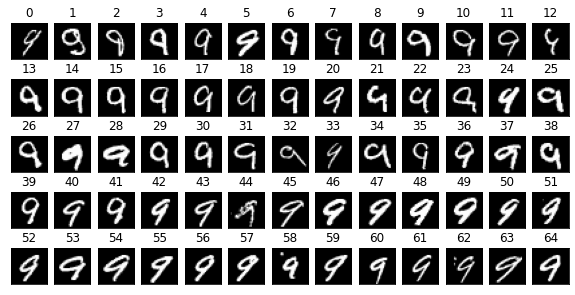

In [ ]:
plt.figure(figsize=(10,5))
for k in range(65):
  plt.subplot(5,13,k+1)
  plt.imshow(X_test.reshape(-1,28,28)[index9_4[k]],cmap='gray') 
  plt.xticks([]) #將x軸顯示為空
  plt.yticks([]) #將y軸顯示為空
  plt.title(k)  #設置圖片標題

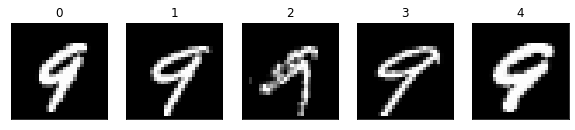

In [ ]:
index94=index9_4[42:47]
plt.figure(figsize=(10,5))
for k in range(5):
  plt.subplot(1,5,k+1)
  plt.imshow(X_test.reshape(-1,28,28)[index94[k]],cmap='gray') 
  plt.xticks([]) #將x軸顯示為空
  plt.yticks([]) #將y軸顯示為空
  plt.title(k)  #設置圖片標題

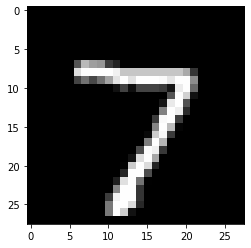

In [ ]:
plt.imshow(X_test[0].reshape((28,28)),cmap='gray')

In [ ]:
index94

[5100, 5135, 6560, 6650]

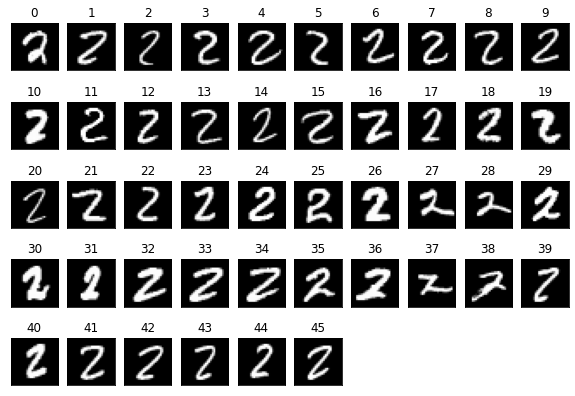

In [ ]:
plt.figure(figsize=(10,7))
for k in range(46):
  plt.subplot(5,10, k+1)
  plt.imshow(X_test.reshape(-1,28,28)[index2_8[k]], cmap='gray')
  plt.xticks([]) #將x軸顯示為空
  plt.yticks([]) #將y軸顯示為空
  plt.title(k)  #設置圖片標題


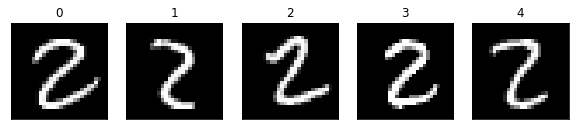

In [ ]:
index28=index2_8[4:9]
plt.figure(figsize=(10,7))
for k in range(5):
  plt.subplot(1,5, k+1)
  plt.imshow(X_test.reshape(-1,28,28)[index28[k]], cmap='gray')
  plt.xticks([]) #將x軸顯示為空
  plt.yticks([]) #將y軸顯示為空
  plt.title(k)  #設置圖片標題